In [89]:
#https://medium.com/@codetrade/grad-cam-in-pytorch-a-powerful-tool-for-visualize-explanations-from-deep-networks-bdc7caf0b282
#https://www.codetrade.io/blog/grad-cam-a-complete-guide-with-example/
#https://towardsdatascience.com/understand-your-algorithm-with-grad-cam-d3b62fce353
#https://github.com/jacobgil/pytorch-grad-cam
#https://arxiv.org/pdf/1610.02391
#https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb

In [90]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [91]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [92]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [93]:
from torch import nn

class FashionMnistModel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                        out_channels=hidden_units,
                        kernel_size=3,
                        stride=1,
                        padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units,
                        hidden_units,
                        3,
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,
                        hidden_units,
                        3,
                        padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                        out_features=output_shape),
        )
        
    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

In [94]:
model = FashionMnistModel(1, 10, 10)

In [95]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [96]:
from helper_functions import accuracy_fn

In [97]:
'''epochs = 5


for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model.train()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            print(f'looked at {batch * len(X)} / {len(train_dataloader.dataset)}')

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"Train Error: {train_loss:.4f}, Test Error: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

test_acc = int(round(test_acc, 0))
torch.save(model.state_dict(), f"models/model_acc_{test_acc}.pth")'''

'epochs = 5\n\n\nfor epoch in range(epochs):\n    print(f"Epoch {epoch+1}\n-------------------------------")\n    train_loss = 0\n\n    for batch, (X, y) in enumerate(train_dataloader):\n        model.train()\n        y_pred = model(X)\n        loss = loss_fn(y_pred, y)\n        train_loss += loss\n\n        optimizer.zero_grad()\n        loss.backward()\n        optimizer.step()\n\n        if batch % 100 == 0:\n            print(f\'looked at {batch * len(X)} / {len(train_dataloader.dataset)}\')\n\n    train_loss /= len(train_dataloader)\n\n    test_loss, test_acc = 0, 0\n    model.eval()\n\n    with torch.inference_mode():\n        for X, y in test_dataloader:\n            test_pred = model(X)\n            test_loss += loss_fn(test_pred, y)\n            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))\n        test_loss /= len(test_dataloader)\n        test_acc /= len(test_dataloader)\n\n    print(f"Train Error: {train_loss:.4f}, Test Error: {test_loss:.4f}, Test Accu

In [98]:
model = FashionMnistModel(1, 10, 10)
model.load_state_dict(torch.load(f"models/model_acc_{86}.pth"))

/tmp/ipykernel_3765/3261369366.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"models/model_acc_{86}.pth"))


<All keys matched successfully>

In [99]:
from torchsummary import summary
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]             100
              ReLU-2           [-1, 10, 28, 28]               0
            Conv2d-3           [-1, 10, 28, 28]             910
              ReLU-4           [-1, 10, 28, 28]               0
         MaxPool2d-5           [-1, 10, 14, 14]               0
            Conv2d-6           [-1, 10, 14, 14]             910
              ReLU-7           [-1, 10, 14, 14]               0
            Conv2d-8           [-1, 10, 14, 14]             910
              ReLU-9           [-1, 10, 14, 14]               0
        MaxPool2d-10             [-1, 10, 7, 7]               0
          Flatten-11                  [-1, 490]               0
           Linear-12                   [-1, 10]           4,910
Total params: 7,740
Trainable params: 7,740
Non-trainable params: 0
-----------------------------------

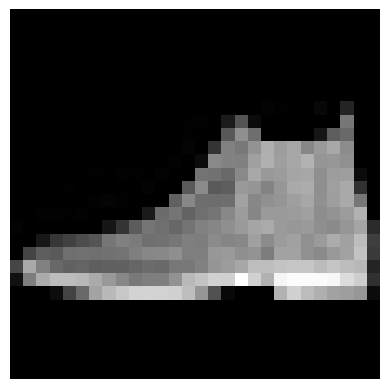

In [100]:

img = test_data[0][0].unsqueeze(0)
y = test_data.targets[100]
plt.imshow(img.squeeze(0).squeeze(0), cmap='gray')
plt.axis('off')

plt.show()

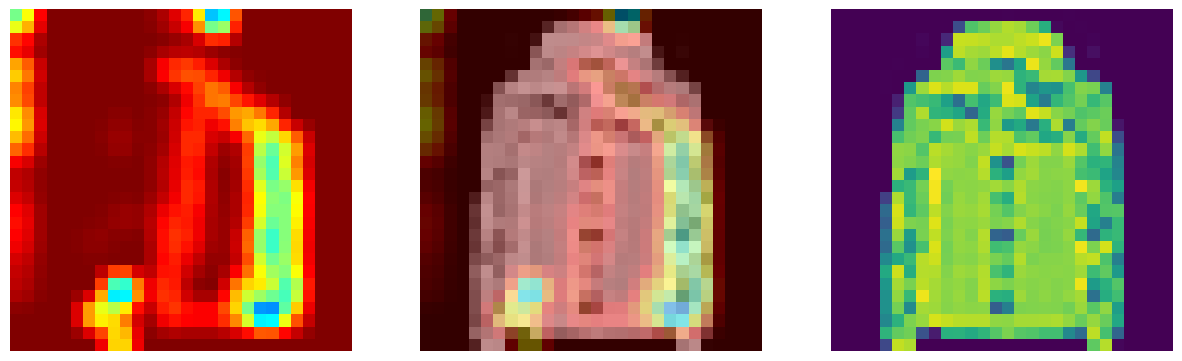

In [101]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

NUM = 130

img = test_data[NUM][0].unsqueeze(0)
y = test_data.targets[100]

target_layer = model.block_2[-3]

activations = []
gradients = []

def forward_hook(module, input, output):
    activations.append(output)

def backward_hook(module, grad_input, grad_output):
    gradients.append(grad_output[0])

target_layer.register_forward_hook(forward_hook)
target_layer.register_full_backward_hook(backward_hook)

model.eval()

output = model(img)
pred_class = output.argmax(dim=1).item()

model.zero_grad()

output[:, pred_class].backward()

gradients = gradients[0].cpu().data.numpy()
activations = activations[0].cpu().data.numpy()

weights = np.mean(gradients, axis=(2, 3))  # Global average pooling of gradients
grad_cam = np.zeros(activations.shape[2:], dtype=np.float32)

for i, w in enumerate(weights[0]):
    grad_cam += w * activations[0, i, :, :]

grad_cam = np.maximum(grad_cam, 0)

grad_cam = (grad_cam - grad_cam.min()) / (grad_cam.max() - grad_cam.min())

heatmap = cv2.resize(grad_cam, (img.shape[2], img.shape[3]))

heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
heatmap = np.float32(heatmap) / 255



img_np = img.cpu().squeeze().numpy() 

overlayed_img = heatmap * 0.4 + np.stack([img_np] * 3, axis=-1) * 0.6  # Replicating the grayscale image into 3 channels


fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

ax[0].imshow(heatmap)
ax[0].axis('off')

ax[1].imshow(np.clip(overlayed_img, 0, 1))
ax[1].axis('off')

ax[2].imshow(img.squeeze())
ax[2].axis('off')

plt.show()